# Summary Graphs
Graphs of data across multiple years sampled weekly.

In [1]:
from IPython.display import display, Markdown
import snakemd
import datetime

from garmindb import GarminConnectConfigManager
from garmindb.garmindb import GarminSummaryDb, YearsSummary

from jupyter_funcs import format_number
from graphs import Graph

years_to_display = 4
days_to_display = (years_to_display * 365)

gc_config = GarminConnectConfigManager()
db_params_dict = gc_config.get_db_params()
garmin_sum_db = GarminSummaryDb(db_params_dict)

graph = Graph()

### Heart Rate

| Year | Avg Resting HR | Min Resting HR | Max Resting HR | Avg HR | Min HR | Max HR |
| ---- | -------------- | -------------- | -------------- | ------ | ------ | ------ |
| 2021 | 59.0           | 49.0           | 71.0           | 76.0   | 37.0   | 197.0  |
| 2022 | 59.0           | 48.0           | 70.0           | 78.0   | 37.0   | 197.0  |
| 2023 | 53.0           | 47.0           | 59.0           | 73.0   | 30.0   | 230.0  |
| 2024 | 52.0           | 47.0           | 59.0           | 75.0   | 30.0   | 229.0  |
| 2025 | 51.0           | 46.0           | 58.0           | 73.0   | 44.0   | 203.0  |

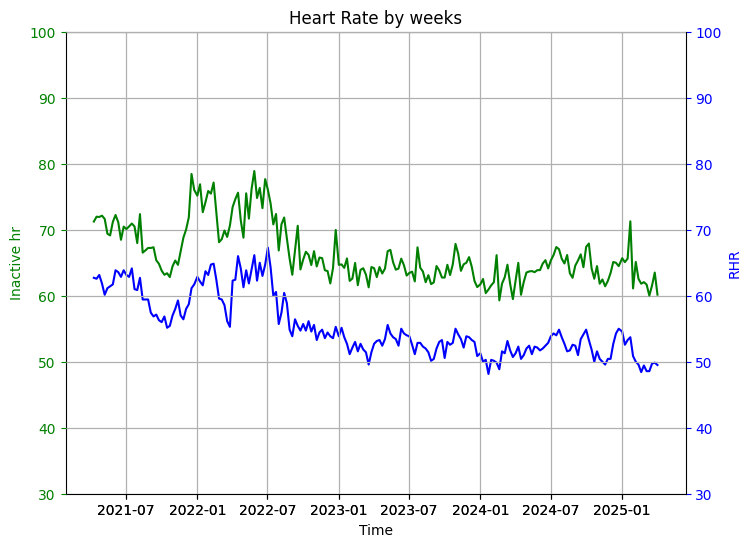

In [2]:
years_data = []
current_year = datetime.date.today().year
for year in range(current_year - years_to_display, current_year + 1):
    year_data = YearsSummary.get_year(garmin_sum_db, year)
    years_data.append([year, format_number(year_data.rhr_avg), format_number(year_data.rhr_min), format_number(year_data.rhr_max),
                       format_number(year_data.hr_avg), format_number(year_data.hr_min), format_number(year_data.hr_max)])

doc = snakemd.new_doc()
doc.add_heading("Heart Rate", 3)
doc.add_table(['Year', 'Avg Resting HR', 'Min Resting HR', 'Max Resting HR', 'Avg HR', 'Min HR', 'Max HR'], years_data)
display(Markdown(str(doc)))
graph.graph_activity('hr', days=days_to_display)

### Intensity Minutes

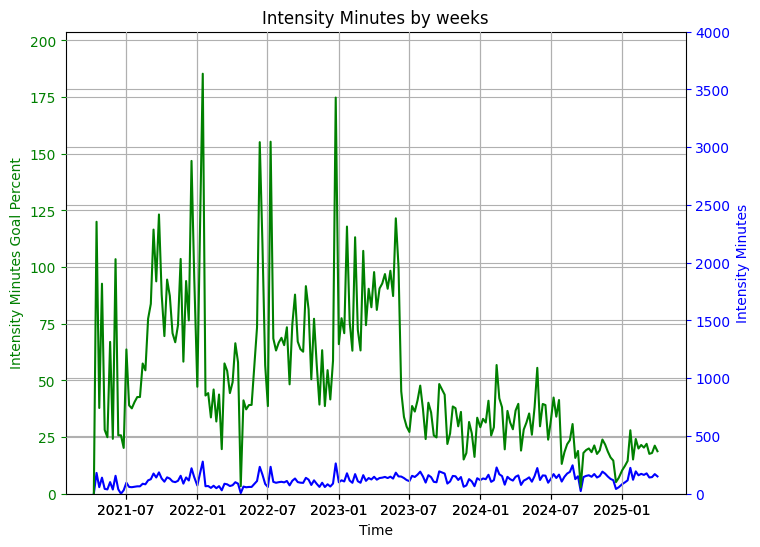

In [3]:
graph.graph_activity('itime', days=days_to_display)

### Steps

| Year | Steps   | Steaps Goal | Steps Goal % |
| ---- | ------- | ----------- | ------------ |
| 2021 | 2498977 | 2863700     | 115.0        |
| 2022 | 3555208 | 4231090     | 119.0        |
| 2023 | 3802420 | 5040010     | 133.0        |
| 2024 | 3962128 | 5369130     | 136.0        |
| 2025 | 1101423 | 1467110     | 133.0        |

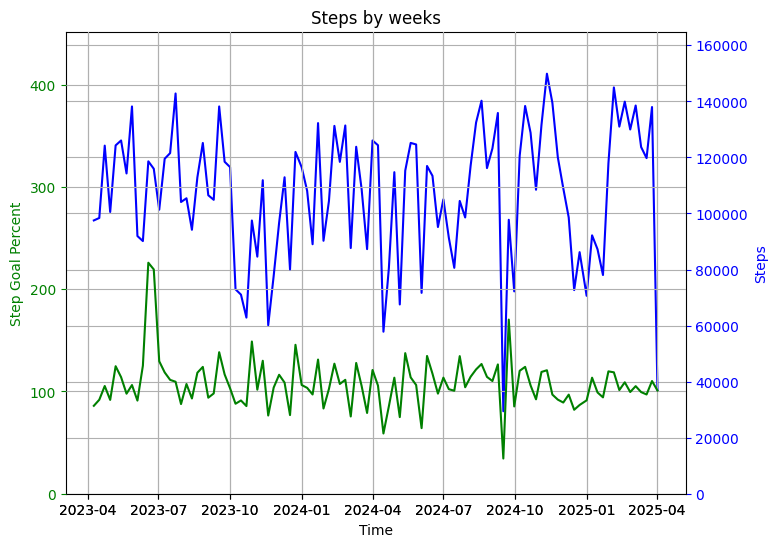

In [4]:
years_data = []
current_year = datetime.date.today().year
for year in range(current_year - years_to_display, current_year + 1):
    year_data = YearsSummary.get_year(garmin_sum_db, year)
    years_data.append([year, year_data.steps, year_data.steps_goal, format_number((year_data.steps_goal / year_data.steps) * 100.0)])

doc = snakemd.new_doc()
doc.add_heading("Steps", 3)
doc.add_table(['Year', 'Steps', 'Steaps Goal', 'Steps Goal %'], years_data)
display(Markdown(str(doc)))
graph.graph_activity('steps')

### Weight

| Year | Avg Weight | Min Weight | Max Weight |
| ---- | ---------- | ---------- | ---------- |
| 2021 | 79.0       | 77.0       | 80.0       |
| 2022 | 77.0       | 75.0       | 79.0       |
| 2023 | 76.0       | 74.0       | 79.0       |
| 2024 | 77.0       | 75.0       | 80.0       |
| 2025 | 77.0       | 76.0       | 79.0       |

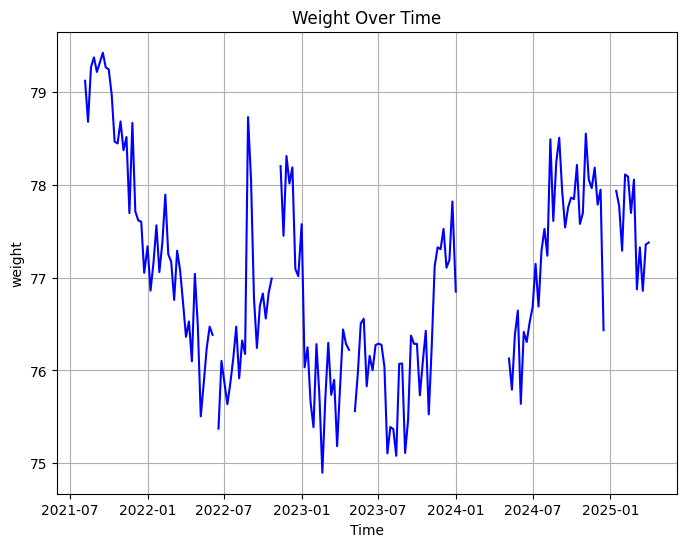

In [5]:
years_data = []
current_year = datetime.date.today().year
for year in range(current_year - years_to_display, current_year + 1):
    year_data = YearsSummary.get_year(garmin_sum_db, year)
    years_data.append([year, format_number(year_data.weight_avg), format_number(year_data.weight_min), format_number(year_data.weight_max)])

doc = snakemd.new_doc()
doc.add_heading("Weight", 3)
doc.add_table(['Year', 'Avg Weight', 'Min Weight', 'Max Weight'], years_data)
display(Markdown(str(doc)))
graph.graph_activity('weight', days=days_to_display)

In [7]:
print(years_data)

[[2021, 79.0, 77.0, 80.0], [2022, 77.0, 75.0, 79.0], [2023, 76.0, 74.0, 79.0], [2024, 77.0, 75.0, 80.0], [2025, 77.0, 76.0, 79.0]]
